# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [10]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import requests
import tweepy
import json
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from wordcloud import WordCloud

In [11]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df_1.sort_values([ 'rating_denominator', 'rating_numerator'])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None


In [14]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [15]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode ='wb') as file:
    file.write(response.content)
    
df_2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [19]:
df_list = []
with open("tweet-json.txt", "r") as file:
    for line in file:
        data = json.loads(line.strip())
        df_list.append({'tweet_id' : data['id_str'],
                        'retweet_count' : data['retweet_count'],
                        'favorite_count' : data['favorite_count']})
        # Process the data here
        if not line: # Check if end-of-file (empty line) is reached
            break

# Create dataframe            
df_3 = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [20]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [21]:
df_3.sort_values('favorite_count')

,tweet_id,retweet_count,favorite_count
484,814578408554463233,6750,0
585,799774291445383169,5488,0
164,860177593139703809,33421,0
588,799308762079035393,6478,0
909,757597904299253760,336,0
170,858860390427611136,8805,0
676,789280767834746880,5747,0
670,789960241177853952,4839,0
385,826615380357632002,4521,0
593,798705661114773508,7724,0


In [22]:
df_3.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# Quality issues

### twitter-archive-enhanced.csv

1. - retweets and tweets with out images
2. - tweet_id and timestamp fields are not in the correct data type
3. - drop the retweet, in_reply field.
4. - rename the name field as dog_name
5. - dog_name field have None as a record 
6. - rating_denominator is less than 10 for some tweets.
7. - source column has url attached that has to be stripped

### image-predictions.tsv

8. - tweet_id is in int64 format instead of object
9. - img_num column is to be dropped.
10. - rename the columns as per naming convention.


# Tidiness issues

### twitter-archive-enhanced.csv
11. - columns doggo, floofer, pupper, puppo breaks tidy rule 1 each variable forms a column. They can be made as field dog_stage.

### image-predictions.tsv
12. clean the prediction_1, _2, _3 records for consistency

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
df_1clean = df_1.copy()
df_2clean = df_2.copy()
df_3clean = df_3.copy()

In [24]:
df_1clean[df_1clean.duplicated(keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [25]:
df_2clean[df_2clean.duplicated(keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [26]:
df_3clean[df_3clean.duplicated(keep=False)]

,tweet_id,retweet_count,favorite_count


### Issue #1:

#### Define:

- filter the data frame with out retweets and images.

In [27]:
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Code

In [28]:
df_1clean = df_1clean[df_1clean.retweeted_status_id.isna()]
df_1clean = df_1clean[df_1clean.expanded_urls.notna()]

#### Test

In [29]:
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #2:

#### Define

- tweet_id and timestamp fields are not in the correct data type. change tweet_id to string and timestamp to timestamp

#### Code

In [30]:
df_1clean.tweet_id = df_1clean.tweet_id.astype(str)
df_1clean.timestamp = pd.to_datetime(df_1clean.timestamp.str.strip(), utc=True)

#### Test

In [31]:
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns, UTC]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: datetime64[ns, U

### Issue #3:

#### Define

- drop the retweet, in_reply field columns

#### Code

In [32]:
df_1clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                          'in_reply_to_status_id', 'in_reply_to_user_id'], inplace = True)

#### Test

In [33]:
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns, UTC]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 215.0+ KB


### Issue #4:

#### Define

- rename the name field as dog_name

#### Code

In [34]:
df_1clean.rename(columns={'name': 'dog_name'}, inplace=True)

#### Test

In [35]:
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns, UTC]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
dog_name              2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 215.0+ KB


### Issue #5:

#### Define

- dog_name field have other words as names which are not relevant

In [36]:
df_1clean.dog_name.value_counts()

None        622
a            55
Lucy         11
Charlie      11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Winston       8
the           8
Sadie         8
Lola          8
Toby          7
Daisy         7
an            6
Bailey        6
Koda          6
Stanley       6
Oscar         6
Bella         6
Jax           6
Bo            6
Buddy         5
Dave          5
Leo           5
Bentley       5
Louis         5
Milo          5
Chester       5
Scout         5
           ... 
Ferg          1
Noah          1
Jazz          1
Swagger       1
Acro          1
Laika         1
Tedders       1
Ralphie       1
Mookie        1
Roscoe        1
Gidget        1
Wishes        1
Spanky        1
all           1
Shaggy        1
Derby         1
Moofasa       1
Tess          1
Ralpher       1
Snoop         1
Bronte        1
Ralphé        1
Davey         1
Julius        1
Finnegus      1
Bode          1
Dante         1
Smiley        1
Brutus        1
Trigger       1
Name: dog_name, Length: 

In [37]:
lowercase_names_df = df_1clean[df_1clean['dog_name'].str.islower()]
not_name = lowercase_names_df.dog_name.value_counts()
not_name.index

Index(['a', 'the', 'an', 'very', 'one', 'quite', 'just', 'getting', 'not',
       'actually', 'space', 'this', 'by', 'my', 'unacceptable', 'old', 'light',
       'life', 'incredibly', 'officially', 'mad', 'all', 'his', 'infuriating',
       'such'],
      dtype='object')

#### Code

In [38]:
df_1clean.replace('None', np.nan, inplace = True)

not_name = ['a','the','an','one','very','just','quite','cash',
            'panda','peaches','pickles','sugar','al','getting',
            'barclay','blanket','nugget','o','actually','all',
            'by','his','incredibly','infuriating','light','my',
            'not','officially','space','such','this','unacceptable']

df_1clean.loc[df_1clean.dog_name.isin([name.title() for name in not_name]), 'dog_name'] = None

df_1clean.loc[df_1clean.dog_name.isin(not_name), 'dog_name'] = None

named_filter = df_1clean['text'].str.contains('named', case=True, na=False)
df_1clean.loc[named_filter, 'dog_name'] = df_1clean.loc[named_filter, 'text'].str.extract(r'named\s+(\w+)', expand=False)

#### Test

In [39]:
df_1clean.dog_name.value_counts()

Charlie     11
Lucy        11
Oliver      10
Cooper      10
Penny        9
Tucker       9
Lola         8
Sadie        8
Winston      8
Daisy        7
Toby         7
Bella        6
Bailey       6
Jax          6
Oscar        6
Bo           6
Stanley      6
Koda         6
Scout        5
Leo          5
Bentley      5
Buddy        5
Dave         5
Rusty        5
Louis        5
Chester      5
Milo         5
Brody        4
Winnie       4
Derek        4
            ..
Swagger      1
Geno         1
Fynn         1
Eriq         1
Shawwn       1
Kawhi        1
Wiggles      1
Kellogg      1
Spanky       1
Spark        1
Shaggy       1
Derby        1
Moofasa      1
Tess         1
Asher        1
Snoop        1
Bronte       1
Ralphé       1
Davey        1
Julius       1
Finnegus     1
Alfredo      1
Bode         1
Dante        1
Smiley       1
Brutus       1
Ralphie      1
Tedders      1
Laika        1
Trigger      1
Name: dog_name, Length: 942, dtype: int64

### Issue #6:

#### Define

- rating_denominator is less than 10 for some tweets.

In [40]:
df_1clean[df_1clean.rating_denominator < 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,NaN,NaN,NaN
2335,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,None,NaN,NaN,NaN,NaN


#### Code

In [41]:
df_1clean.loc[df_1clean.tweet_id == '810984652412424192', 'rating_numerator'] = 0
df_1clean.loc[df_1clean.tweet_id == '810984652412424192', 'rating_denominator'] = 10
df_1clean.loc[df_1clean.tweet_id == '666287406224695296', 'rating_numerator'] = 9
df_1clean.loc[df_1clean.tweet_id == '666287406224695296', 'rating_denominator'] = 10

#### Test

In [42]:
df_1clean[df_1clean.rating_denominator < 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo


### Issue #7:

#### Define

- Source column has url attached that has to be stripped

In [43]:
df_1clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1985
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

#### Code

In [44]:
df_1clean['source'] = df_1clean['source'].apply(lambda source : source.split('>', 1)[-1][:-4])

#### Test

In [45]:
df_1clean.source.value_counts()

Twitter for iPhone     1985
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

### Issue #8:

#### Define

- tweet_id is in int64 format instead of object

In [46]:
df_2clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Code

In [47]:
df_2clean.tweet_id = df_2clean.tweet_id.astype(str)

#### Test

In [48]:
df_2clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #9:

#### Define

- img_num is not required in the dataframe. so dropping it.

#### Code

In [49]:
df_2clean.drop(columns = 'img_num', inplace = True)

#### Test

In [50]:
df_2clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 135.8+ KB


### Issue #10:

#### Define

- rename the columns as per naming convention.

#### Code

In [51]:
df_2clean.rename(columns = {'p1':'prediction_1', 'p2':'prediction_2', 'p3':'prediction_3',
                            'p1_conf':'prediction_1_confidence', 'p2_conf':'prediction_2_confidence', 'p3_conf':'prediction_3_confidence',
                            'p1_dog':'prediction_1_dog', 'p2_dog':'prediction_2_dog', 'p3_dog':'prediction_3_dog',
                            'jpg_url':'image_url'},
                 inplace = True )

#### Test

In [52]:
df_2clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id                   2075 non-null object
image_url                  2075 non-null object
prediction_1               2075 non-null object
prediction_1_confidence    2075 non-null float64
prediction_1_dog           2075 non-null bool
prediction_2               2075 non-null object
prediction_2_confidence    2075 non-null float64
prediction_2_dog           2075 non-null bool
prediction_3               2075 non-null object
prediction_3_confidence    2075 non-null float64
prediction_3_dog           2075 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 135.8+ KB


### Issue #11:

#### Define

- clean the prediction_1, _2, _3 records for consistency

#### Code

In [53]:
df_2clean[['prediction_1', 'prediction_2', 'prediction_3']].head()

,prediction_1,prediction_2,prediction_3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman


In [54]:
df_2clean['prediction_1'] = df_2clean['prediction_1'].str.replace('[-_]', ' ', regex = True).str.title()
df_2clean['prediction_2'] = df_2clean['prediction_2'].str.replace('[-_]', ' ', regex = True).str.title()
df_2clean['prediction_3'] = df_2clean['prediction_3'].str.replace('[-_]', ' ', regex = True).str.title()

#### Test

In [55]:
df_2clean[['prediction_1', 'prediction_2', 'prediction_3']].head()

,prediction_1,prediction_2,prediction_3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman


### Issue #12:

#### Define

- columns doggo, floofer, pupper, puppo breaks tidy rule 1 each variable forms a column. They can be made as field dog_stage.

#### Code

In [56]:
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns, UTC]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
dog_name              1402 non-null object
doggo                 84 non-null object
floofer               10 non-null object
pupper                232 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 215.0+ KB


In [57]:
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']
df_1clean[dog_stages].sample(10)

,doggo,floofer,pupper,puppo
2118,NaN,NaN,NaN,NaN
172,doggo,NaN,NaN,NaN
1740,NaN,NaN,pupper,NaN
1301,NaN,NaN,NaN,NaN
2009,NaN,NaN,pupper,NaN
1402,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN
1806,NaN,NaN,pupper,NaN
1528,NaN,NaN,NaN,NaN
1310,NaN,NaN,NaN,NaN


In [58]:
dogs_stage = pd.melt( df_1clean, id_vars = 'tweet_id', value_vars = dog_stages, 
                     var_name = 'dog_stage', value_name = 'stage_text')

In [59]:
dogs_stage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8468 entries, 0 to 8467
Data columns (total 3 columns):
tweet_id      8468 non-null object
dog_stage     8468 non-null object
stage_text    350 non-null object
dtypes: object(3)
memory usage: 198.5+ KB


In [60]:
dogs_stage_notnull = dogs_stage.dropna(subset=['stage_text']).drop('stage_text', axis = 1)

In [61]:
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns, UTC]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
dog_name              1402 non-null object
doggo                 84 non-null object
floofer               10 non-null object
pupper                232 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 215.0+ KB


In [62]:
dogs_stage_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 9 to 7222
Data columns (total 2 columns):
tweet_id     350 non-null object
dog_stage    350 non-null object
dtypes: object(2)
memory usage: 8.2+ KB


In [63]:
df_1clean = pd.merge(df_1clean, dogs_stage_notnull, how = 'left', on = 'tweet_id', indicator = False)

In [64]:
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2128
Data columns (total 13 columns):
tweet_id              2129 non-null object
timestamp             2129 non-null datetime64[ns, UTC]
source                2129 non-null object
text                  2129 non-null object
expanded_urls         2129 non-null object
rating_numerator      2129 non-null int64
rating_denominator    2129 non-null int64
dog_name              1406 non-null object
doggo                 96 non-null object
floofer               11 non-null object
pupper                242 non-null object
puppo                 25 non-null object
dog_stage             350 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(10)
memory usage: 232.9+ KB


In [65]:
df_1clean.drop(columns = dog_stages, inplace = True)

In [66]:
df_1clean['dog_stage'] = df_1clean['dog_stage'].astype('category')

#### Test

In [67]:
df_1clean.dog_stage.value_counts()

pupper     232
doggo       84
puppo       24
floofer     10
Name: dog_stage, dtype: int64

In [68]:
df_1clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2128
Data columns (total 9 columns):
tweet_id              2129 non-null object
timestamp             2129 non-null datetime64[ns, UTC]
source                2129 non-null object
text                  2129 non-null object
expanded_urls         2129 non-null object
rating_numerator      2129 non-null int64
rating_denominator    2129 non-null int64
dog_name              1406 non-null object
dog_stage             350 non-null category
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 152.0+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [69]:
df_1clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [70]:
df_2clean

,tweet_id,image_url,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft Coated Wheaten Terrier,0.082086,True


In [71]:
df_13clean = pd.merge(df_1clean, df_3clean, how = 'left', on = 'tweet_id', indicator = False)
df_123clean = pd.merge(df_13clean, df_2clean, how = 'left', on = 'tweet_id', indicator = False)
df_123clean = df_123clean.dropna(subset=['image_url'])
df_123clean.to_csv('twitter_archive_master.csv')

In [72]:
df_123clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 0 to 2128
Data columns (total 21 columns):
tweet_id                   2005 non-null object
timestamp                  2005 non-null datetime64[ns, UTC]
source                     2005 non-null object
text                       2005 non-null object
expanded_urls              2005 non-null object
rating_numerator           2005 non-null int64
rating_denominator         2005 non-null int64
dog_name                   1362 non-null object
dog_stage                  317 non-null category
retweet_count              2005 non-null int64
favorite_count             2005 non-null int64
image_url                  2005 non-null object
prediction_1               2005 non-null object
prediction_1_confidence    2005 non-null float64
prediction_1_dog           2005 non-null object
prediction_2               2005 non-null object
prediction_2_confidence    2005 non-null float64
prediction_2_dog           2005 non-null object
prediction_3     

In [73]:
df_123clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count,image_url,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,True,English Springer,0.225770,True,German Short Haired Pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,True,Border Collie,0.199287,True,Ice Lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish Terrier,0.487574,True,Irish Setter,0.193054,True,Chesapeake Bay Retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [74]:
df_123clean.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,prediction_1_confidence,prediction_2_confidence,prediction_3_confidence
count,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2.005000e+03,2.005000e+03
mean,12.266833,10.534663,2781.190025,8935.604988,0.594761,1.342001e-01,6.015674e-02
std,41.383426,7.297801,4688.295617,12238.792356,0.272019,1.006367e-01,5.088742e-02
min,0.000000,10.000000,16.000000,81.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,629.000000,2011.000000,0.362925,5.353130e-02,1.605590e-02
50%,11.000000,10.000000,1367.000000,4163.000000,0.588230,1.171220e-01,4.944380e-02
75%,12.000000,10.000000,3224.000000,11332.000000,0.847292,1.948970e-01,9.160200e-02
max,1776.000000,170.000000,79515.000000,132810.000000,1.000000,4.880140e-01,2.734190e-01


In [75]:
# check for duplicates in the entire dataframe
df_123clean[df_123clean.duplicated(keep=False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count,image_url,prediction_1,prediction_1_confidence,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Find the favorite dog stage based on retweet and favorite counts

In [76]:
fav_dog_stage = df_123clean.groupby('dog_stage')[['retweet_count', 'favorite_count']].sum().reset_index()
fav_dog_stage = fav_dog_stage.melt(id_vars='dog_stage', value_vars=['retweet_count', 'favorite_count'], var_name='Metric', value_name='Count')
fav_dog_stage = fav_dog_stage.sort_values('Count', ascending = False)
print(fav_dog_stage)

  dog_stage          Metric    Count
6    pupper  favorite_count  1573939
4     doggo  favorite_count  1397263
7     puppo  favorite_count   522650
2    pupper   retweet_count   516558
0     doggo   retweet_count   508299
3     puppo   retweet_count   161623
5   floofer  favorite_count   109611
1   floofer   retweet_count    38214


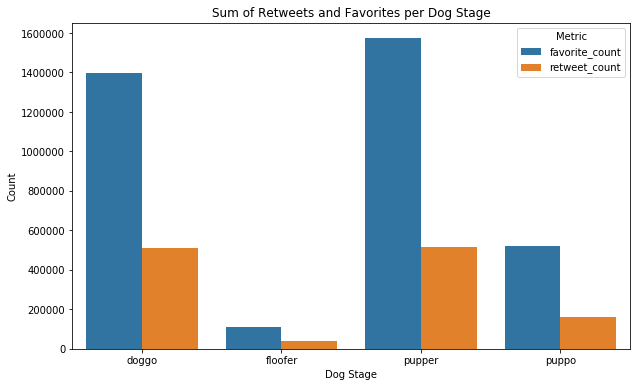

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x='dog_stage', y='Count', hue='Metric', data=fav_dog_stage)
plt.title('Sum of Retweets and Favorites per Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Count')
plt.show()

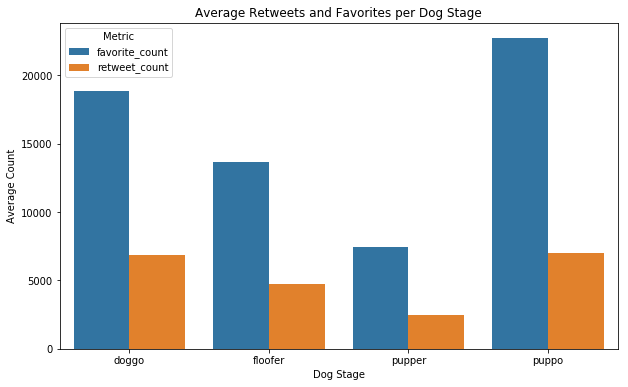

In [78]:
df_avg = df_123clean.groupby('dog_stage')[['retweet_count', 'favorite_count']].mean().reset_index()
df_avg = df_avg.melt(id_vars='dog_stage', value_vars=['retweet_count', 'favorite_count'], var_name='Metric', value_name='Count')
df_avg = df_avg.sort_values('Count', ascending = False)

plt.figure(figsize=(10, 6))
sns.barplot(x='dog_stage', y='Count', hue='Metric', data=df_avg)
plt.title('Average Retweets and Favorites per Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Average Count')
plt.show()

### Is there a corelation between retweets and favorite counts

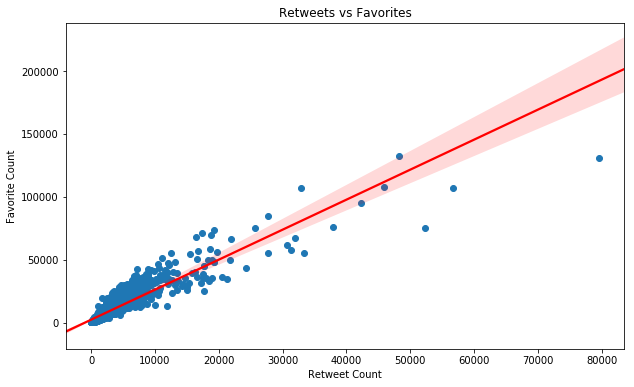

In [79]:
# Scatter Plot with regression line for retweet_count vs favorite_count
plt.figure(figsize=(10, 6))
plt.scatter(df_123clean['retweet_count'], df_123clean['favorite_count'], label='Data Points')
sns.regplot(x='retweet_count', y='favorite_count', data=df_123clean, scatter=False, color='red')  # Adds a collinearity line
plt.title('Retweets vs Favorites')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.show()

### What does the tweets in dataset looks like

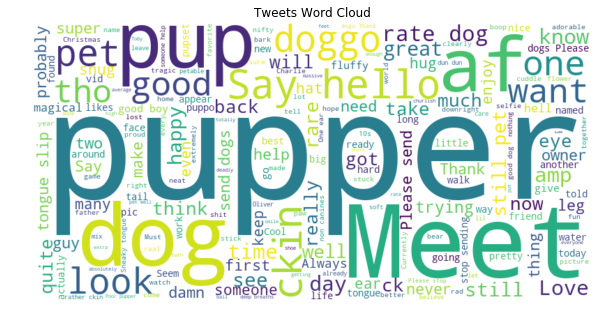

In [80]:
# Apply a lambda function to remove URLs from text

df_123clean['text_without_urls'] = df_123clean['text'].str.replace(' af ', '', regex=False)
df_123clean['text_without_urls'] = df_123clean['text_without_urls'].apply(lambda text_without_urls: re.sub(r'http\S+', '', text_without_urls))

# Combine all text without URLs from the 'text_without_urls' column into a single string
text_without_urls = ' '.join(df_123clean['text_without_urls'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_without_urls)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Tweets Word Cloud')
plt.axis('off')
plt.show()

### What are the similar breeds based on prediction model

In [81]:
similar_breeds = df_123clean.groupby(['prediction_1', 'prediction_2', 'prediction_3']
                                    )['tweet_id'].count().reset_index(name='volume'
                                                                     ).sort_values(by='volume', ascending=False)
print(similar_breeds.head(5))


          prediction_1        prediction_2 prediction_3  volume
974           Malamute      Siberian Husky   Eskimo Dog      17
1145          Pembroke            Cardigan    Chihuahua      15
660   Golden Retriever  Labrador Retriever       Kuvasz      15
1143          Pembroke            Cardigan      Basenji      11
1447    Siberian Husky          Eskimo Dog     Malamute       9


### Prediction confidence levels

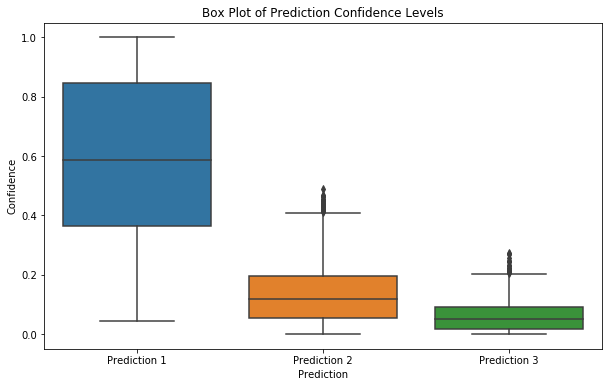

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_123clean[['prediction_1_confidence', 'prediction_2_confidence', 'prediction_3_confidence']])
plt.title('Box Plot of Prediction Confidence Levels')
plt.xlabel('Prediction')
plt.ylabel('Confidence')
plt.xticks([0, 1, 2], ['Prediction 1', 'Prediction 2', 'Prediction 3'])
plt.show()

### Popular dog names

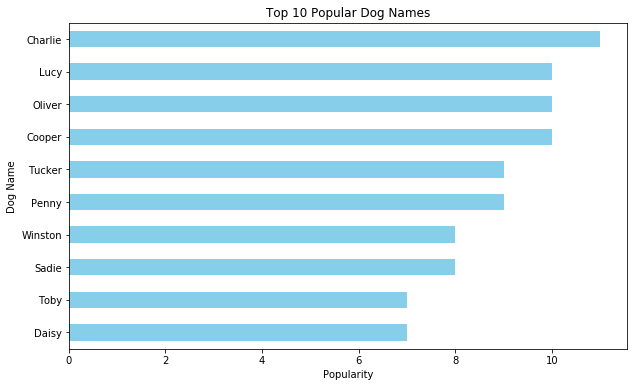

In [83]:
popular_dog_names = df_123clean.groupby('dog_name'
                                       )['tweet_id'].count().sort_values(ascending=False).head(10)

# Plot horizontal bar plot
plt.figure(figsize=(10, 6))
popular_dog_names.plot(kind='barh', color='skyblue')
plt.title('Top 10 Popular Dog Names')
plt.xlabel('Popularity')
plt.ylabel('Dog Name')
plt.gca().invert_yaxis()  # Invert y-axis to display the most popular names at the top
plt.show()

### 10 Popular dog breeds

In [84]:
predicted_dogs = df_123clean[df_123clean.prediction_1_dog == True]

prediction_1_group = predicted_dogs.groupby('prediction_1')['favorite_count'].agg([('favorite_count','sum'),('no_of_tweets','count')])
prediction_1_group['mean_favorite'] = (prediction_1_group.favorite_count / prediction_1_group.no_of_tweets).round(2)
prediction_1_group = prediction_1_group.sort_values('mean_favorite', ascending = False)

prediction_1_group.head(10)

,favorite_count,no_of_tweets,mean_favorite
prediction_1,,,
Saluki,96240,4,24060.00
Flat Coated Retriever,182177,9,20241.89
French Bulldog,465738,26,17913.00
Afghan Hound,51980,3,17326.67
Black And Tan Coonhound,34024,2,17012.00
Irish Water Spaniel,49200,3,16400.00
English Springer,158084,10,15808.40
Standard Poodle,110502,7,15786.00
Cardigan,260287,17,15311.00


### 10 Least popular dog breeds

In [85]:
prediction_1_group.tail(10)

,favorite_count,no_of_tweets,mean_favorite
prediction_1,,,
Entlebucher,2678,1,2678.00
Lhasa,13299,5,2659.80
Scottish Deerhound,7457,3,2485.67
Soft Coated Wheaten Terrier,25139,11,2285.36
Standard Schnauzer,2046,1,2046.00
Groenendael,1896,1,1896.00
Tibetan Terrier,7364,4,1841.00
Japanese Spaniel,1362,1,1362.00
Ibizan Hound,3344,3,1114.67


### Popular platforms for users

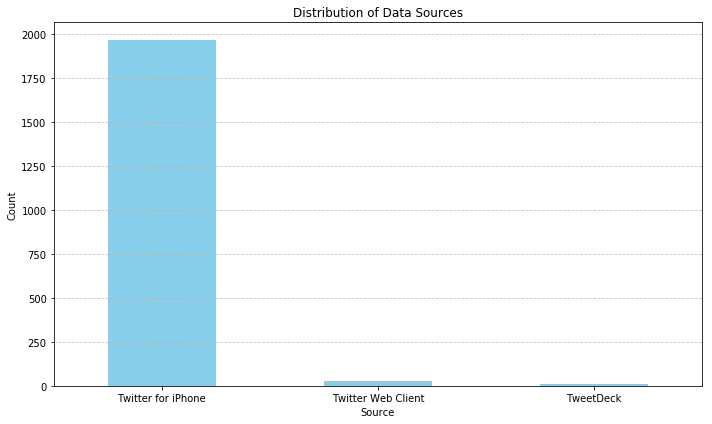

In [86]:
# Count the occurrences of each source
source_counts = df_123clean.source.value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  
source_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Distribution of Data Sources')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for readability

# Show the plot
plt.tight_layout()
plt.show()

### Tweets per month

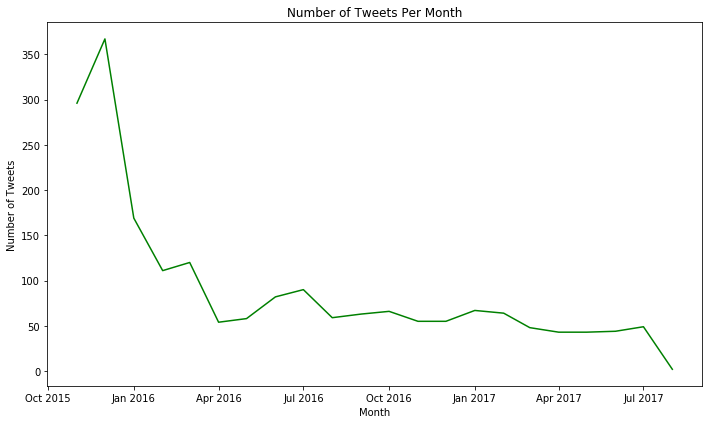

In [87]:
# Calculate the number of tweets per month
tweet_count_per_month = df_123clean.groupby(df_123clean['timestamp'].dt.to_period('M')).size()

# Convert the PeriodIndex to a DateTimeIndex for plotting
tweet_count_per_month.index = tweet_count_per_month.index.to_timestamp()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(tweet_count_per_month.index, tweet_count_per_month, label='Number of Tweets', color='green')

# Add title and labels
plt.title('Number of Tweets Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Display the plot
plt.tight_layout()
plt.show()


### Average retweets and likes over time

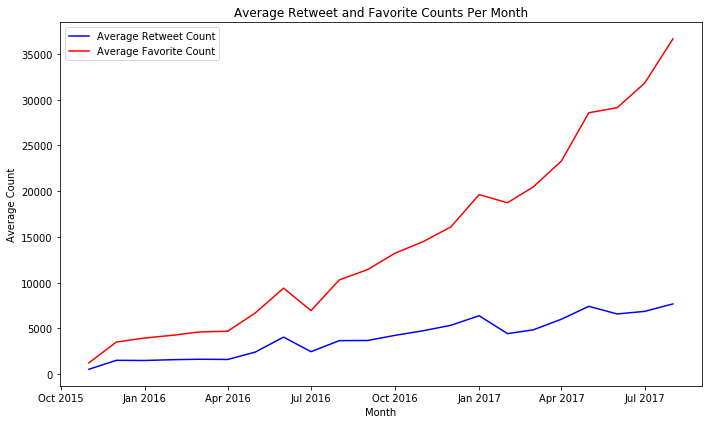

In [88]:
# Calculate the average retweet and favorite counts per month
average_monthly_data = df_123clean.groupby(df_123clean['timestamp'].dt.to_period('M')).agg({
    'retweet_count': 'mean',
    'favorite_count': 'mean'
})

# Convert the PeriodIndex to a DateTimeIndex for plotting
average_monthly_data.index = average_monthly_data.index.to_timestamp()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(average_monthly_data.index, average_monthly_data['retweet_count'], label='Average Retweet Count', color='blue')
plt.plot(average_monthly_data.index, average_monthly_data['favorite_count'], label='Average Favorite Count', color='red')

# Add title and labels
plt.title('Average Retweet and Favorite Counts Per Month')
plt.xlabel('Month')
plt.ylabel('Average Count')

# Add legend
plt.legend()

# Format x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Display the plot
plt.tight_layout()
plt.show()



### Insights:

1. Twitter for iPhone is the top platform for the tweets.

2. Saluki emerged as the top favorite dog breed and Brabancon Griffon is the least favorite dog based on the average favorite count.

3. Charlie is the popular dog name followed closely by Lucy, Oliver and Cooper.

4. The median confidence level of Prediction_1 is above 50% where as the other predictions are less than 20%

5. From the word cloud on tweets it can be observed that the tweets are about the dogs and all are positive.

6. There is a positive corelation between retweets and favorites.

7. Pupper followed by Doggo is the loved stages of dog based on the sum of favorite and retweet counts. 

8. Puppo emerged as a favorite dogstage when the averages are considered.

9. Number of tweets per month decreased over time.

10. The average retweet and favorite counts increased over time.